# Prophet Time Series Experiments

## First Experiments

### Connect to project directory

In [2]:
import os
import sys

# Get the absolute path of the current notebook
notebook_dir = os.path.dirname(os.path.abspath("__file__"))

# Navigate up one directory to get the project root
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# Add the project root to sys.path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project root added to sys.path: {project_root}")


Project root added to sys.path: C:\Users\farac\PycharmProjects\KyaEdge\Time-Series-Model


### Create generator 

In [14]:
from time_series_generation.prophet_style.tsg_prophet import *
from matplotlib import pyplot as plt
configs = ParametersGenerationConfigs()
generator = TimeSeriesDirectorProphet(TimeSeriesGeneratorProphet(), configs)


### Define functions that translate time series in dataframes requested by prophet

In [15]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

def create_prophet_dataframe(time_series, start_date=None):
    """
    Converts a NumPy time series into a Pandas DataFrame formatted for Prophet.

    Parameters:
    - time_series (numpy.ndarray): The time series data (numeric values).
    - start_date (str or datetime, optional): The start date for the time series. Defaults to today.

    Returns:
    - pd.DataFrame: A DataFrame with 'ds' and 'y' columns for Prophet.
    """
    if start_date is None:
        start_date = datetime.today()
    else:
        start_date = pd.to_datetime(start_date)

    # Create date range starting from the given start_date
    dates = [start_date + timedelta(days=i) for i in range(len(time_series))]

    # Create the DataFrame
    df = pd.DataFrame({
        'ds': dates,
        'y': time_series
    })
    
    return df

### Change configs and Create time series

In [16]:
configs.baseline["n_years_max"] = 5
#configs.baseline["baseline_min"] = baseline_min
#configs.baseline["baseline_max"] = baseline_max
configs.baseline["unit_is_energy"] = True
configs.trend["max_shift_year"] = 3
#configs.trend["value_change_ratio"] = value_change_ratio
configs.seasonal["frequencies"] = [
      {"value" :  7, "params_number": 3, "coeff_ratio_std" :  0.5, "prob" :  0},
      {"value" :  30, "params_number": 5, "coeff_ratio_std" :  0.6, "prob" :  0.5},
      {"value" :  60, "params_number": 7, "coeff_ratio_std" :  0.7, "prob" :  0.5},
      {"value" :  365, "params_number": 10, "coeff_ratio_std" :  0.8, "prob" :  0.5}
      ]
#configs.noise["std_max"] = noise_std_max
#configs.holidays["max_number_of_holidays_year"] = max_holidays
#configs.holidays["holidays_max_window"] = max_window
#configs.holidays["std_max"] = holiday_std_max
#configs.seasonal["frequencies"] = f
#configs.inactivity["max_prob"] = inactivity_max_prob
#configs.reset()

2024-12-17 16:27:02 - ProphetLogger - INFO - Baseline
2024-12-17 16:27:02 - ProphetLogger - INFO - Baseline : Units -> 1095, Baseline Value -> 413.440318316345, Max Value -> 650.0469521096999, Sum Value -> 452717.14855639776
2024-12-17 16:27:02 - ProphetLogger - INFO - 

 TREND
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Number of shifts ->6
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Base k Rate -> -5.2662258699558935, Base m -> 0, Value change -> -889.992172022546
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Interval -> (169, 275), Rate change -> 13.888037014958435, Value change -> 913.9119813702692
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Interval -> (275, 302), Rate change -> -32.035340550652634, Value change -> -632.1652939525526
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Interval -> (302, 440), Rate change -> 22.385480567790566, Value change -> -141.870739624615
2024-12-17 16:27:02 - ProphetLogger - INFO - Trend : Interval -> (440, 

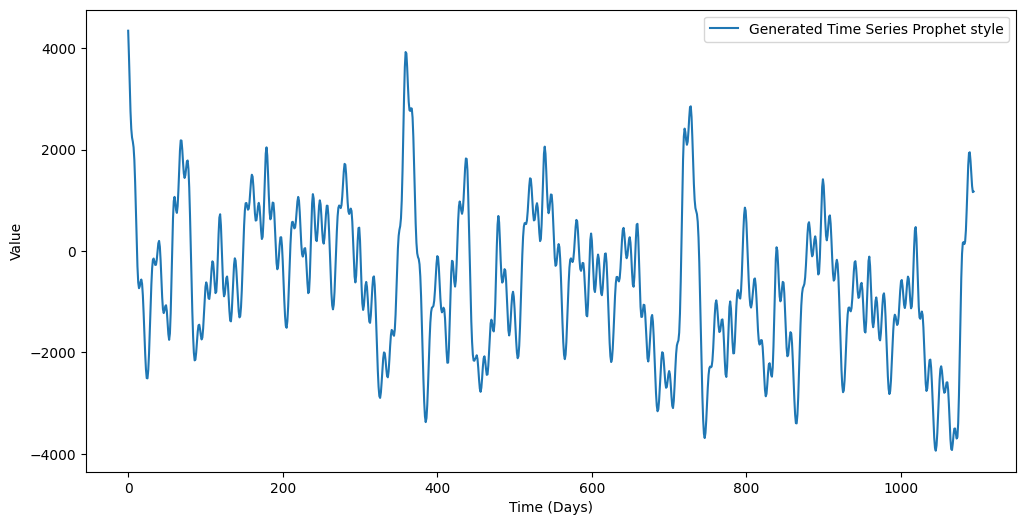

In [18]:
time_series = generator.make_ts_conditional(TimeSeriesFlags(True, True, False, False, False, False, False))
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Generated Time Series Prophet style")
plt.xlabel("Time (Days)")
plt.ylabel("Value")
plt.legend()
plt.show()

### Prophet Fit

In [34]:
from prophet import Prophet
from prophet.diagnostics import cross_validation

In [35]:
df = create_prophet_dataframe(time_series)
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)

2024-12-17 16:53:15 - cmdstanpy - DEBUG - cmd: where.exe tbb.dll
cwd: None
2024-12-17 16:53:15 - cmdstanpy - DEBUG - TBB already found in load path
2024-12-17 16:53:15 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2024-12-17 16:53:15 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmp7pqcr79x\nvdytwsx.json
2024-12-17 16:53:15 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmp7pqcr79x\vtb4yhiq.json
2024-12-17 16:53:15 - cmdstanpy - DEBUG - idx 0
2024-12-17 16:53:15 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2024-12-17 16:53:15 - cmdstanpy - DEBUG - CmdStan args: ['C:\\Users\\farac\\PycharmProjects\\KyaEdge\\Time-Series-Model\\.venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=2098', 'data', 'file=C:\\Users\\farac\\AppData\\Local\\Temp\\tmp7pqcr79x\\nvdytwsx.json', 'init=C:\\Users\\farac\\AppData\\Local\\Temp\\tmp7pqcr79x\\vtb4yhiq.js

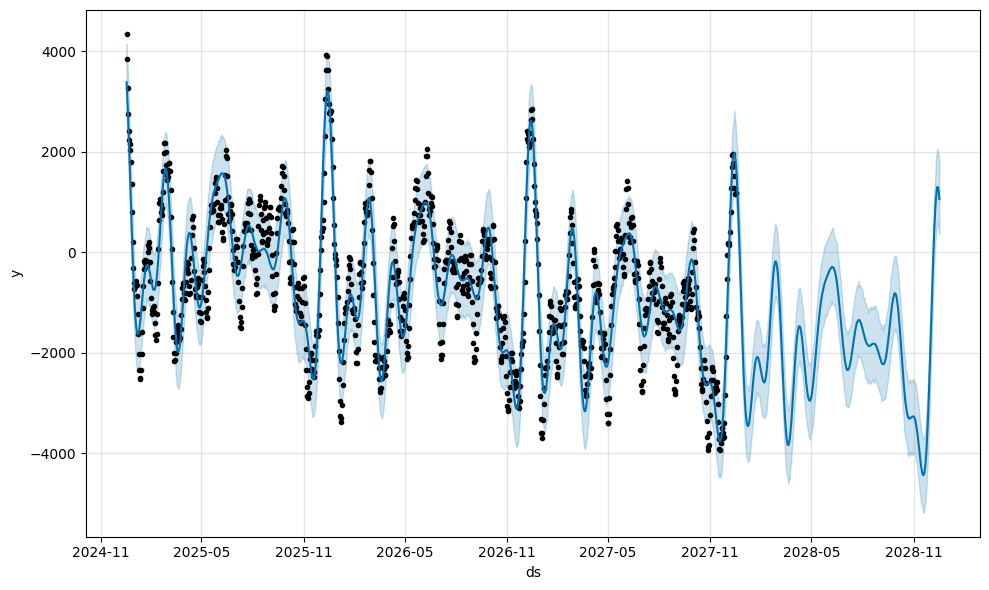

In [36]:
forecast = m.predict(future)
fig = m.plot(forecast)

In [38]:
df_cv_c = cross_validation(
    m, '364 days', initial='730 days', period='180 days')
cutoff = df_cv_c['cutoff'].unique()[0]
df_cv = df_cv_c[df_cv_c['cutoff'].values == cutoff]

2024-12-17 16:55:17 - prophet - INFO - Making 1 forecasts with cutoffs between 2026-12-17 16:53:15.641896 and 2026-12-17 16:53:15.641896
  0%|          | 0/1 [00:00<?, ?it/s]2024-12-17 16:55:17 - cmdstanpy - DEBUG - cmd: where.exe tbb.dll
cwd: None
2024-12-17 16:55:17 - cmdstanpy - DEBUG - TBB already found in load path
2024-12-17 16:55:17 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmp7pqcr79x\wnryg_r3.json
2024-12-17 16:55:17 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmp7pqcr79x\_6p7as0u.json
2024-12-17 16:55:17 - cmdstanpy - DEBUG - idx 0
2024-12-17 16:55:17 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2024-12-17 16:55:17 - cmdstanpy - DEBUG - CmdStan args: ['C:\\Users\\farac\\PycharmProjects\\KyaEdge\\Time-Series-Model\\.venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=75271', 'data', 'file=C:\\Users\\farac\\AppData\\Local\\Temp\\tmp7pqcr79x\\wnryg_r3.json', 'init=C:\\Users\\fara

Text(0.5, 0, 'ds')

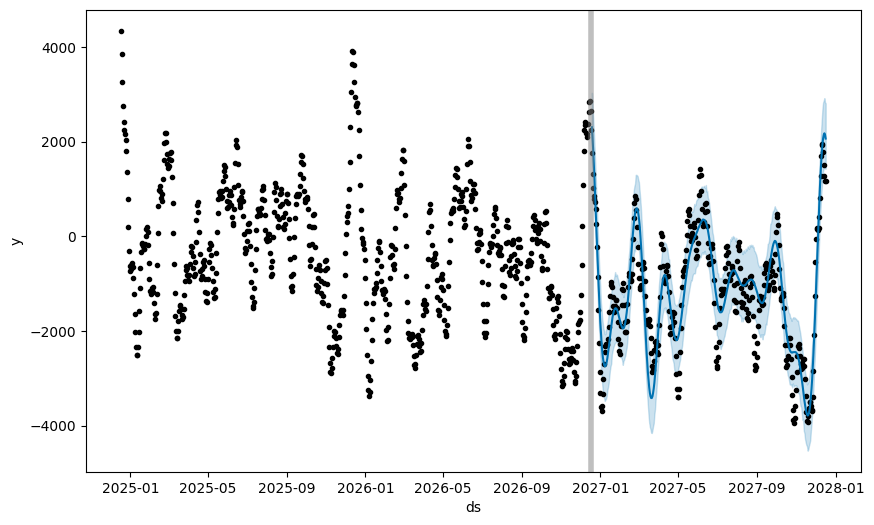

In [39]:
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [40]:
cutoff = df_cv_c['cutoff'].unique()[1]
df_cv = df_cv_c[df_cv_c['cutoff'].values == cutoff]

IndexError: index 1 is out of bounds for axis 0 with size 1

Text(0.5, 0, 'ds')

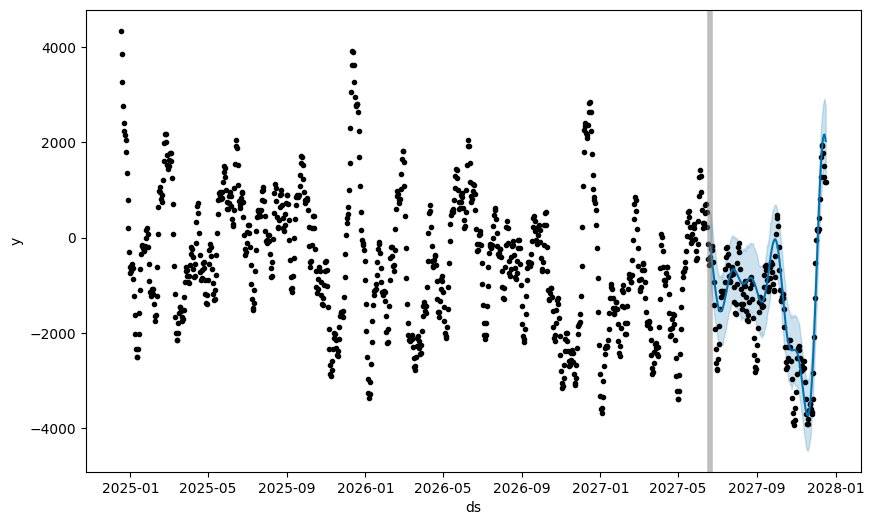

In [33]:
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [30]:
df_cv_c.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2026-12-22 16:48:21.154738,1095.449772,427.766794,1864.435689,784.132332,2026-12-21 16:48:21.154738
1,2026-12-23 16:48:21.154738,752.831325,23.088342,1515.016296,727.013626,2026-12-21 16:48:21.154738
2,2026-12-24 16:48:21.154738,395.296239,-290.070236,1116.403220,576.563982,2026-12-21 16:48:21.154738
3,2026-12-25 16:48:21.154738,33.080849,-685.473243,767.352788,265.026736,2026-12-21 16:48:21.154738
4,2026-12-26 16:48:21.154738,-327.011575,-1041.642692,337.915322,-223.457034,2026-12-21 16:48:21.154738


In [31]:
df_cv_c.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
355,2027-12-12 16:48:21.154738,2090.768204,1349.935119,2784.859685,1775.073885,2027-06-19 16:48:21.154738
356,2027-12-13 16:48:21.154738,2150.241230,1427.618644,2868.110408,1513.395291,2027-06-19 16:48:21.154738
357,2027-12-14 16:48:21.154738,2166.757536,1480.130241,2915.772681,1280.923619,2027-06-19 16:48:21.154738
358,2027-12-15 16:48:21.154738,2123.689749,1377.941205,2838.078068,1161.944228,2027-06-19 16:48:21.154738
359,2027-12-16 16:48:21.154738,2029.689625,1292.936569,2740.194904,1173.910125,2027-06-19 16:48:21.154738
